In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt 
from IPython.core.pylabtools import  figsize
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

%matplotlib inline

# A/Bテスト

## 事前確率

In [2]:
with pm.Model() as model:
    p=pm.Uniform('p',lower=0,upper=1)

## 観測データを生成するために、真の分布を構築

In [3]:
p_true=0.05 # 本当はわからない
N=1500 # 標本数

occ=stats.bernoulli.rvs(p_true,size=N)

print(occ)
print(occ.sum())

[0 0 0 ... 0 0 0]
64


## 事後分布のモデルを構築

In [4]:
with model:
    # 尤度
    obs=pm.Bernoulli('obs',p,observed=occ)
    step=pm.Metropolis()
    trace=pm.sample(18000,step=step)
    burned_trace=trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains: 100%|██████████| 74000/74000 [00:09<00:00, 7493.11draws/s]
The number of effective samples is smaller than 25% for some parameters.


## 事後分布を可視化

/Users/hiroaki/.pyenv/versions/3.6.5/envs/pycoon365/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


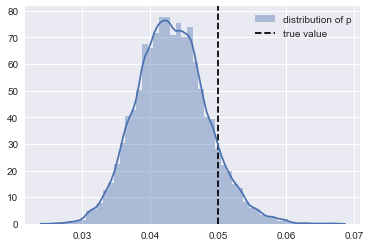

In [15]:
fig,ax=plt.subplots()
sns.distplot(a=burned_trace['p'],ax=ax,label='distribution of p')
ax.vlines(p_true,0,90,linestyles='--',label='true value')
ax.legend()

## AサイトとBサイトのCV数の比較

In [28]:
true_p_A=0.05
true_p_B=0.04


N_A=1500
N_B=750

occ_A=stats.bernoulli.rvs(true_p_A,size=N_A)
occ_B=stats.bernoulli.rvs(true_p_B,size=N_B)

print(obs_A.mean())
print(obs_B.mean())

0.04933333333333333
0.042666666666666665


### モデル構築


In [45]:
with pm.Model() as model:
    p_A=pm.Uniform('p_A',0,1)
    p_B=pm.Uniform('p_B',0,1)
    
    # p_Aとp_Bにより決定するので決定的
    delta=pm.Deterministic('delta',p_A-p_B)
    
    obs_A=pm.Bernoulli('obs_A',p_A,observed=occ_A)
    obs_B=pm.Bernoulli('obs_B',p_B,observed=occ_B)
    
    
    # 事後分布を計算
    step=pm.Metropolis()
    trace=pm.sample(20000,step=step)
    
    burned_trace=trace[1000:]
    
    

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 4 chains: 100%|██████████| 82000/82000 [00:13<00:00, 5883.24draws/s]
The number of effective samples is smaller than 25% for some parameters.


/Users/hiroaki/.pyenv/versions/3.6.5/envs/pycoon365/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'delta')

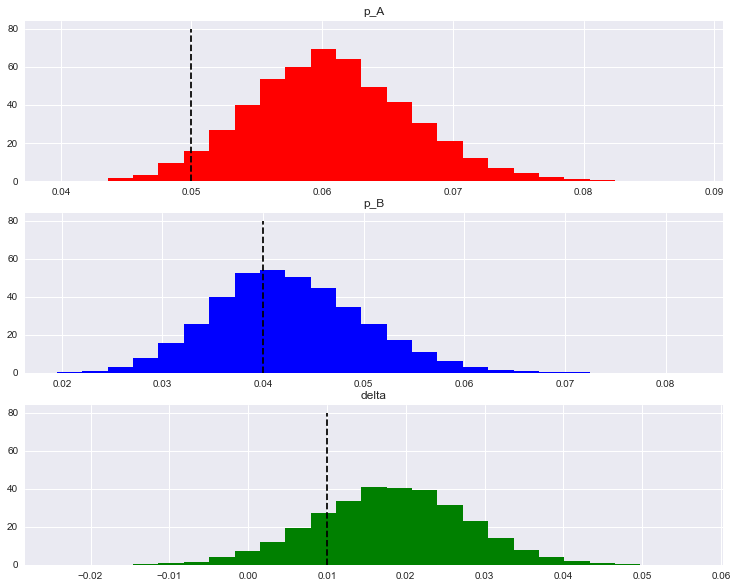

In [48]:
figsize(12.5,10)

ax1=plt.subplot(311)
ax1.hist(burned_trace['p_A'],bins=25,normed=True,color='r')
ax1.vlines(true_p_A,0,80,linestyles='--')
ax1.set_title('p_A')

ax2=plt.subplot(312)
ax2.hist(burned_trace['p_B'],bins=25,normed=True,color='b')
ax2.vlines(true_p_B,0,80,linestyles='--')
ax2.set_title('p_B')

ax3=plt.subplot(313)
ax3.hist(burned_trace['delta'],bins=25,normed=True,color='g')
ax3.vlines(true_p_A-true_p_B,0,80,linestyles='--')
ax3.set_title('delta')

# いろいろ実験したやつ

In [6]:
with pm.Model() as det_test:
    def subtract(x, y):
        return x - y

    stochastic_1 = pm.Uniform("U_1", 0, 1)
    stochastic_2 = pm.Uniform("U_2", 0, 1)

    det_1 = pm.Deterministic("Delta", subtract(stochastic_1, stochastic_2))

In [7]:
type(det_1)

theano.tensor.var.TensorVariable

In [8]:
with pm.Model() as theano_test:
    p1=pm.Uniform('p',0,1)
    p2=1-p1
    p=tt.stack([p1,p2])
    
    asg=pm.Categorical('asg',p)

In [9]:
data = np.array([10, 25, 15, 20, 35])
with pm.Model() as model:
    obs = pm.Poisson("obs", pm.Uniform('p',0,1), observed=data)
print(obs.tag.test_value)

[10 25 15 20 35]
